In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(256, 256),
    batch_size=32
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 2 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0]


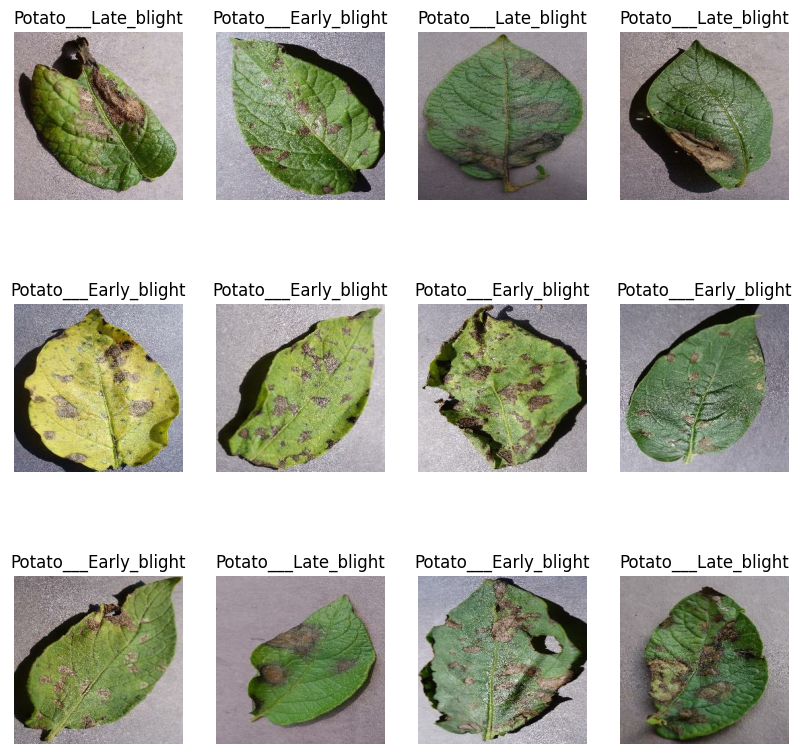

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

68

In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [11]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

54

In [17]:
len(val_ds)

6

In [18]:
len(test_ds)

8

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.5921569  0.5686275  0.62352943]
  [0.5921569  0.5686275  0.62352943]
  [0.5882353  0.5647059  0.61960787]
  ...
  [0.60784316 0.58431375 0.6392157 ]
  [0.6039216  0.5803922  0.63529414]
  [0.61960787 0.59607846 0.6509804 ]]

 [[0.59607846 0.57254905 0.627451  ]
  [0.59607846 0.57254905 0.627451  ]
  [0.5921569  0.5686275  0.62352943]
  ...
  [0.6039216  0.5803922  0.63529414]
  [0.6039216  0.5803922  0.63529414]
  [0.61960787 0.59607846 0.6509804 ]]

 [[0.5921569  0.5686275  0.62352943]
  [0.5921569  0.5686275  0.62352943]
  [0.5882353  0.5647059  0.61960787]
  ...
  [0.6039216  0.5803922  0.63529414]
  [0.60784316 0.58431375 0.6392157 ]
  [0.61960787 0.59607846 0.6509804 ]]

 ...

 [[0.49803922 0.47058824 0.53333336]
  [0.4627451  0.43529412 0.49803922]
  [0.45490196 0.42745098 0.49019608]
  ...
  [0.5019608  0.4862745  0.5411765 ]
  [0.49411765 0.47843137 0.53333336]
  [0.47058824 0.45490196 0.50980395]]

 [[0.47843137 0.4509804  0.5137255 ]
  [0.44705883 0.41960785 0.48235294]


In [21]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
]) 

In [22]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [23]:
BATCH_SIZE

32

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 39s 651ms/step - loss: 0.9041 - accuracy: 0.4855 - val_loss: 0.8746 - val_accuracy: 0.5469
Epoch 2/50
54/54 [==============================] - 102s 2s/step - loss: 0.7167 - accuracy: 0.6453 - val_loss: 0.4056 - val_accuracy: 0.8281
Epoch 3/50
54/54 [==============================] - 108s 2s/step - loss: 0.4362 - accuracy: 0.8067 - val_loss: 0.2876 - val_accuracy: 0.8906
Epoch 4/50
54/54 [==============================] - 135s 2s/step - loss: 0.3357 - accuracy: 0.8582 - val_loss: 0.3112 - val_accuracy: 0.8490
Epoch 5/50
54/54 [==============================] - 145s 3s/step - loss: 0.2569 - accuracy: 0.8941 - val_loss: 0.3243 - val_accuracy: 0.8542
Epoch 6/50
54/54 [==============================] - 140s 3s/step - loss: 0.2251 - accuracy: 0.9022 - val_loss: 0.2383 - val_accuracy: 0.8958
Epoch 7/50
54/54 [==============================] - 42s 739ms/step - loss: 0.1875 - accuracy: 0.9230 - val_loss: 0.1799 - val_accuracy: 0.9167
Epoch 8/5

In [28]:
len(test_ds)

8

In [29]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 209ms/step - loss: 5.9297e-05 - accuracy: 1.0000


In [30]:
scores

[5.929657709202729e-05, 1.0]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
type(history.history['loss'])

list

In [35]:
len(history.history['loss']) 

50

In [36]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9040886163711548,
 0.716666042804718,
 0.4362017810344696,
 0.3356896936893463,
 0.25693953037261963]

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

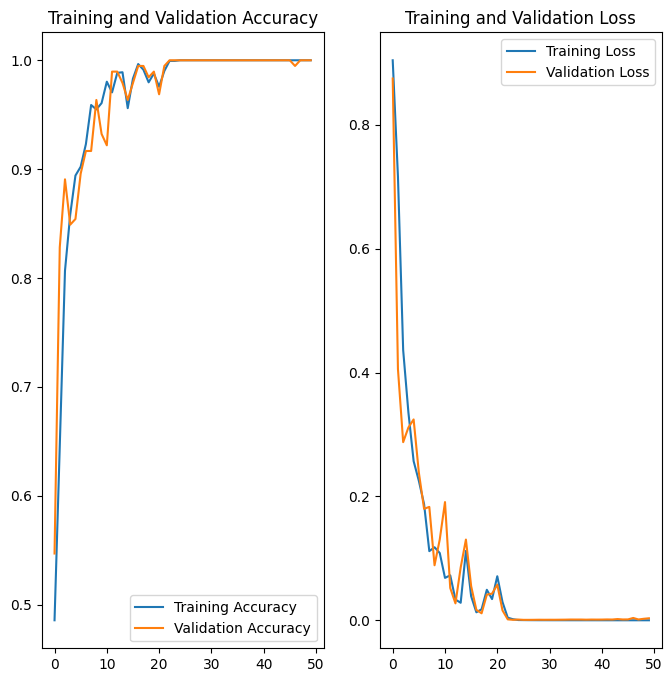

In [38]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
history.history['accuracy']

[0.48553240299224854,
 0.6452546119689941,
 0.8067129850387573,
 0.8582175970077515,
 0.8940972089767456,
 0.9021990895271301,
 0.9230324029922485,
 0.9589120149612427,
 0.9548611044883728,
 0.9606481194496155,
 0.9803240895271301,
 0.9704861044883728,
 0.9884259104728699,
 0.9890046119689941,
 0.9560185074806213,
 0.9832175970077515,
 0.9965277910232544,
 0.9913194179534912,
 0.9797453880310059,
 0.9878472089767456,
 0.9756944179534912,
 0.9901620149612427,
 0.9994212985038757,
 0.9994212985038757,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


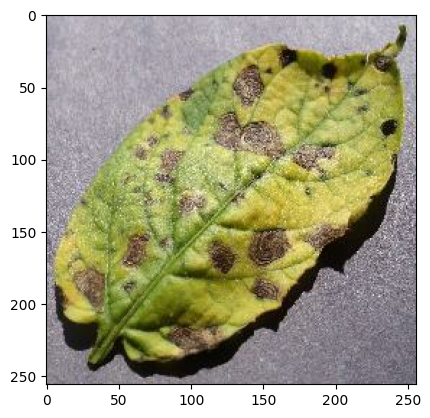

In [40]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

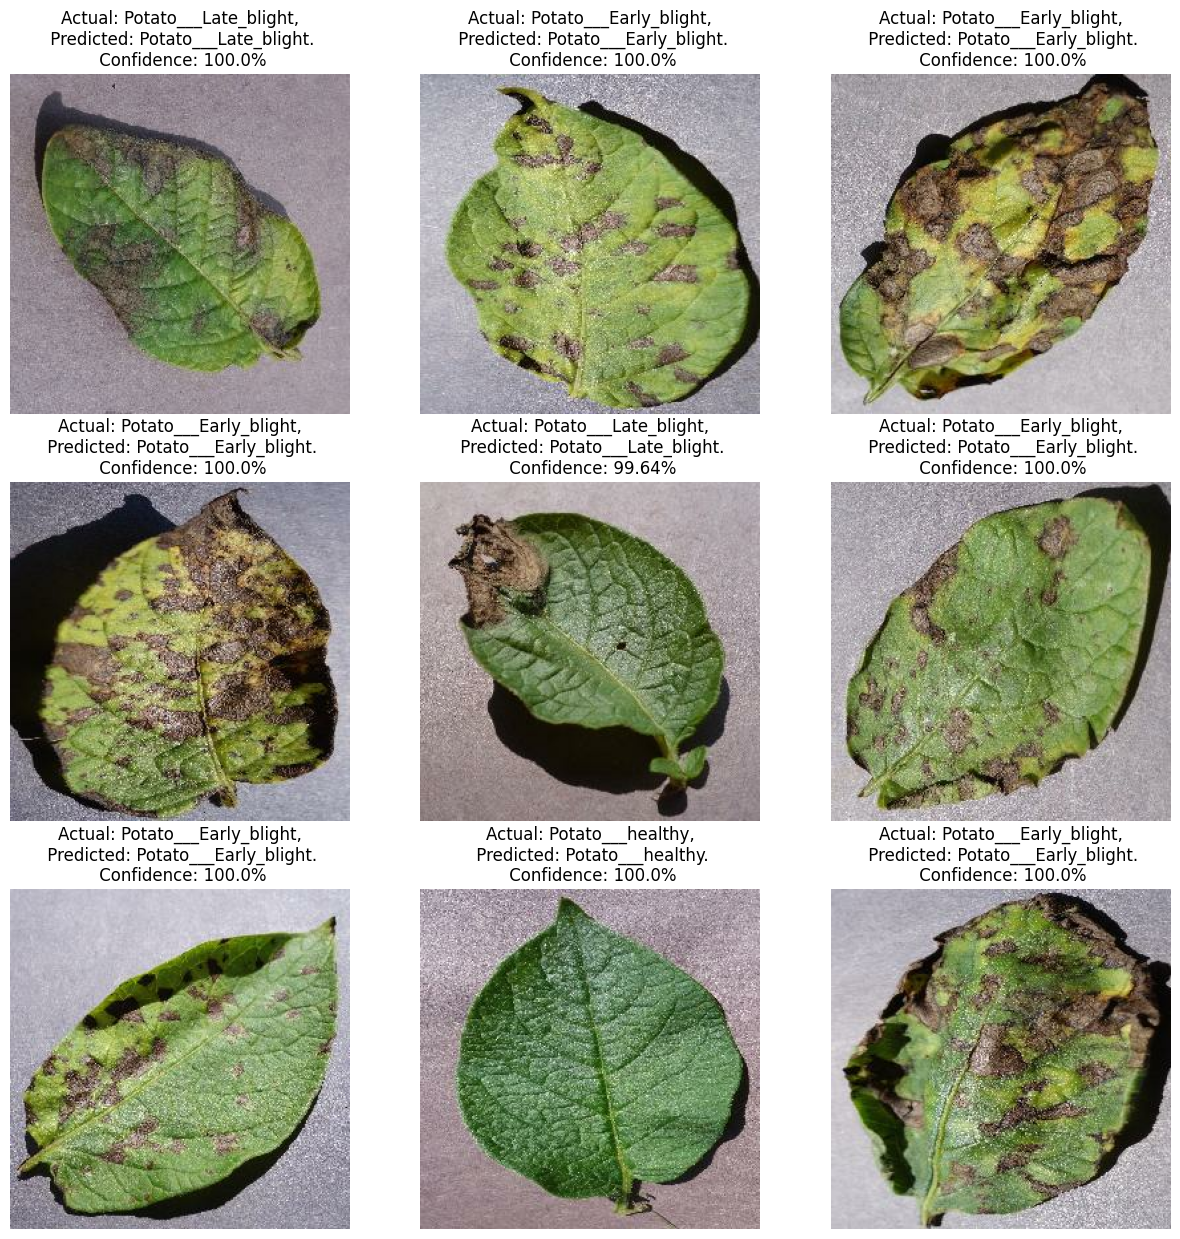

In [42]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [44]:
import os
# model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
# model.save(f"../models/{model_version}")

model_version=max([int(i) for i in os.listdir("../saved_models") + [0]])+1
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/2\assets


In [45]:
model.save("../potatoes.h5")